<a href="https://colab.research.google.com/github/2303A51069/AIML-2025_B16/blob/main/LAB_EXAM%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols",
           "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue",
           "OD280/OD315", "Proline"]
data = pd.read_csv(url, header=None, names=columns)

In [3]:
binary_data = data[data["Class"] != 3]
X = binary_data.iloc[:, 1:]
y = binary_data["Class"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
svc_linear = SVC(kernel="linear", random_state=42)
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)


Linear Kernel SVM (Without Scaling):
Accuracy: 1.0
Confusion Matrix:
 [[13  0]
 [ 0 13]]


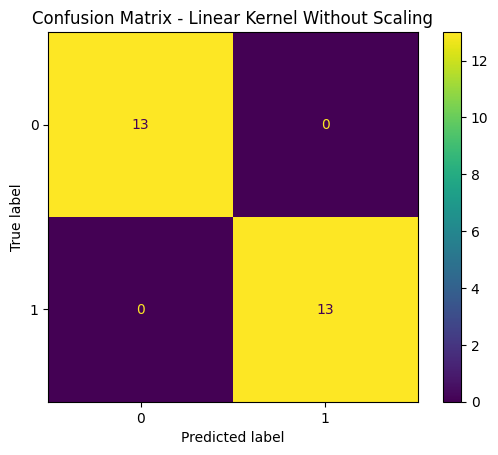

In [7]:
print("Linear Kernel SVM (Without Scaling):")
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - Linear Kernel Without Scaling")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [11]:
svc_linear_pca = SVC(kernel="linear", random_state=42)
svc_linear_pca.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
import numpy as np # Import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt


def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # np is now defined
                         np.arange(y_min, y_max, h)) # np is now defined
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# ... (rest of your code) ...

In [14]:
svc_rbf = SVC(kernel="rbf", random_state=42)
svc_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svc_rbf.predict(X_test_scaled)


RBF Kernel SVM (With Scaling):
Accuracy: 1.0
Confusion Matrix:
 [[13  0]
 [ 0 13]]


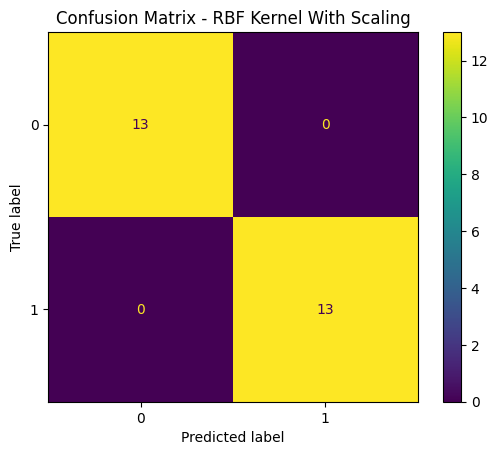

In [15]:
print("RBF Kernel SVM (With Scaling):")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix:\n", cm_rbf)
ConfusionMatrixDisplay(confusion_matrix=cm_rbf).plot()
plt.title("Confusion Matrix - RBF Kernel With Scaling")
plt.show()

In [16]:
svc_rbf_no_scaling = SVC(kernel="rbf", random_state=42)
svc_rbf_no_scaling.fit(X_train, y_train)
y_pred_rbf_no_scaling = svc_rbf_no_scaling.predict(X_test)

RBF Kernel SVM (Without Scaling):
Accuracy: 0.8846153846153846
Confusion Matrix:
 [[11  2]
 [ 1 12]]


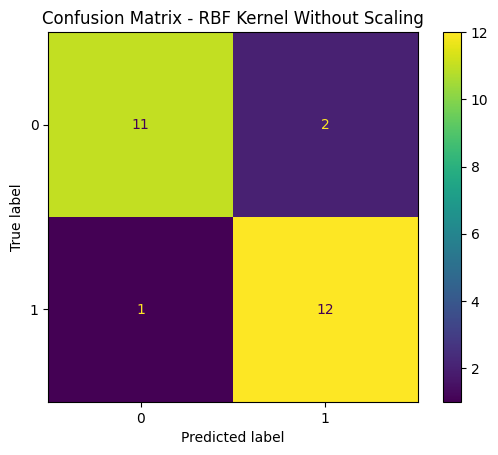

In [17]:
print("RBF Kernel SVM (Without Scaling):")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf_no_scaling))
cm_rbf_no_scaling = confusion_matrix(y_test, y_pred_rbf_no_scaling)
print("Confusion Matrix:\n", cm_rbf_no_scaling)
ConfusionMatrixDisplay(confusion_matrix=cm_rbf_no_scaling).plot()
plt.title("Confusion Matrix - RBF Kernel Without Scaling")
plt.show()